# DATA PREPARATION AND DATA UNDERSTANDING

In [1]:
# LIBRARIES
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.option_context('display.colheader_justify','left')

In [2]:
df = pd.read_csv(r'file:employee_attrition_dataset.csv')

### 1- Data Semantic

In [3]:
print("***** Composition ******")
print("{1} features for {0} employees".format(*df.shape))
print("_____________________________________________________________________________________")
df.head()

***** Composition ******
33 features for 1470 employees
_____________________________________________________________________________________


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,763,Sales,15,2,Medical,1,Male,59,1,2,Sales Executive,4,Divorced,4298.0,22098,6,Y,Yes,14,3.0,4,80.0,2,7,1.0,2,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,Male,70,3,3,Sales Executive,3,Married,5304.0,19002,2,Y,No,13,4.0,1,NaN,3,10,2.0,3,8.0,0,0,0
2,56.0,No,Non-Travel,150,Research & Development,2,4,Technical Degree,4,Male,60,3,2,Manufacturing Director,4,Divorced,6306.0,17433,2,Y,No,11,4.0,3,80.0,1,12,2.0,2,13.0,3,1,4
3,41.0,Yes,NaN,359,Human Resources,18,5,Human Resources,4,Male,89,4,1,Human Resources,1,Married,6430.0,21495,0,Y,No,17,3.0,3,80.0,0,2,4.0,3,3.0,0,0,0
4,42.0,No,NaN,642,Research & Development,1,3,Life Sciences,4,Male,76,3,1,Research Scientist,4,Married,2766.0,21412,3,Y,No,22,4.0,1,NaN,1,12,6.0,3,5.0,3,1,0


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

#### The data source, for each value of the categorical data, has provided a corrispective numerical value. The definition is the following:

**Education** : <br>
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

**EnvironmentSatisfaction**: <br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobInvolvement**: <br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobSatisfaction**: <br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**PerformanceRating**: <br>
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

**RelationshipSatisfaction**: <br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**WorkLifeBalance**: <br>
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

#### check variables type and missing values

In [5]:
print(df.nunique())
print("_____________________")
print("*****Info*****")
print(df.info())
print("_____________________")
print("***** Missing values *****")
print(df.isna().sum())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1112
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                36
YearsInCur

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1258.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1190.000000,1470.000000,1470.000000,1470.000000,1298.000000,1470.000000,753.0,1470.000000,1470.000000,1178.000000,1470.000000,1396.000000,1470.000000,1470.000000,1470.000000
mean,37.115262,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6548.915966,14313.103401,2.693197,15.209524,3.154083,2.712245,80.0,0.793878,11.279592,2.810696,2.761224,6.942693,4.229252,2.187755,4.123129
std,9.068654,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4732.775331,7117.786044,2.498009,3.659938,0.361168,1.081209,0.0,0.852077,7.780782,1.302499,0.706476,6.033444,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2973.250000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4907.500000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8437.500000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Variables distributions

<ipython-input-7-ac4b3cf26c79>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


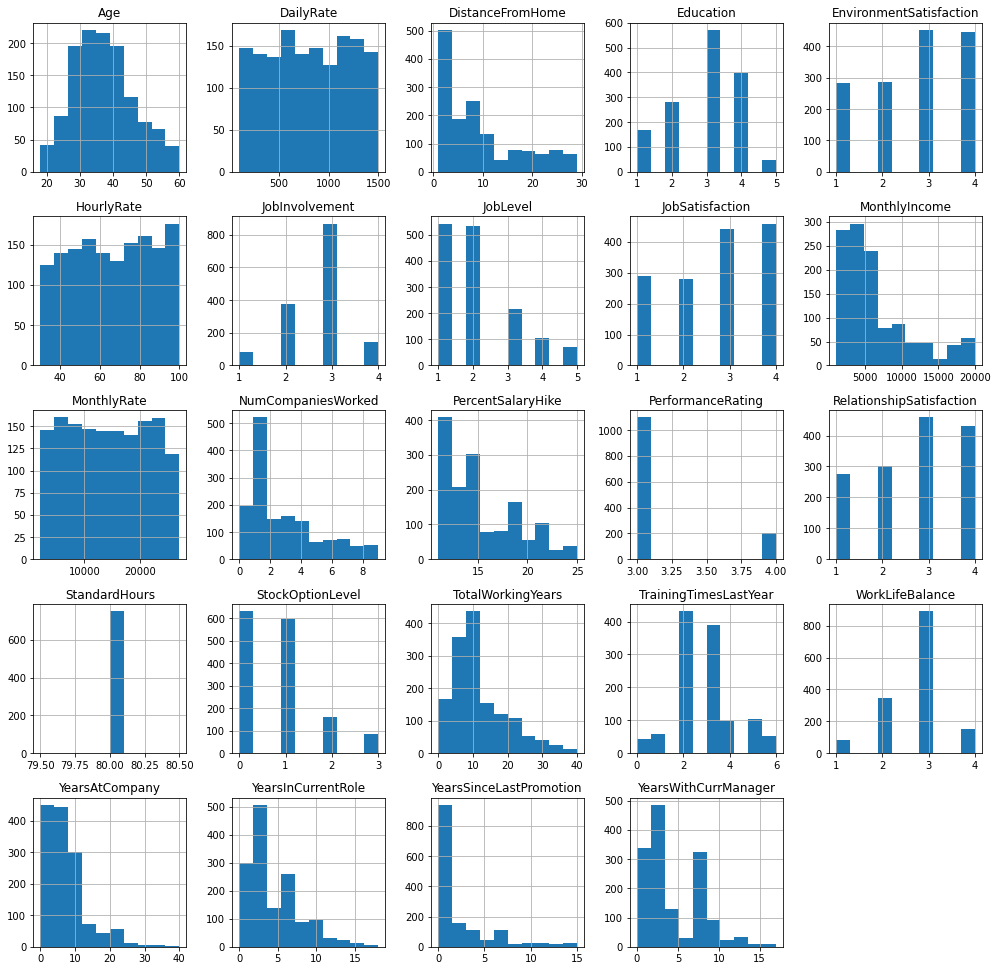

In [7]:
fig = plt.figure(figsize = (17,17))
ax = fig.gca()
df.hist(ax=ax)
plt.show()


Distribution categorical data

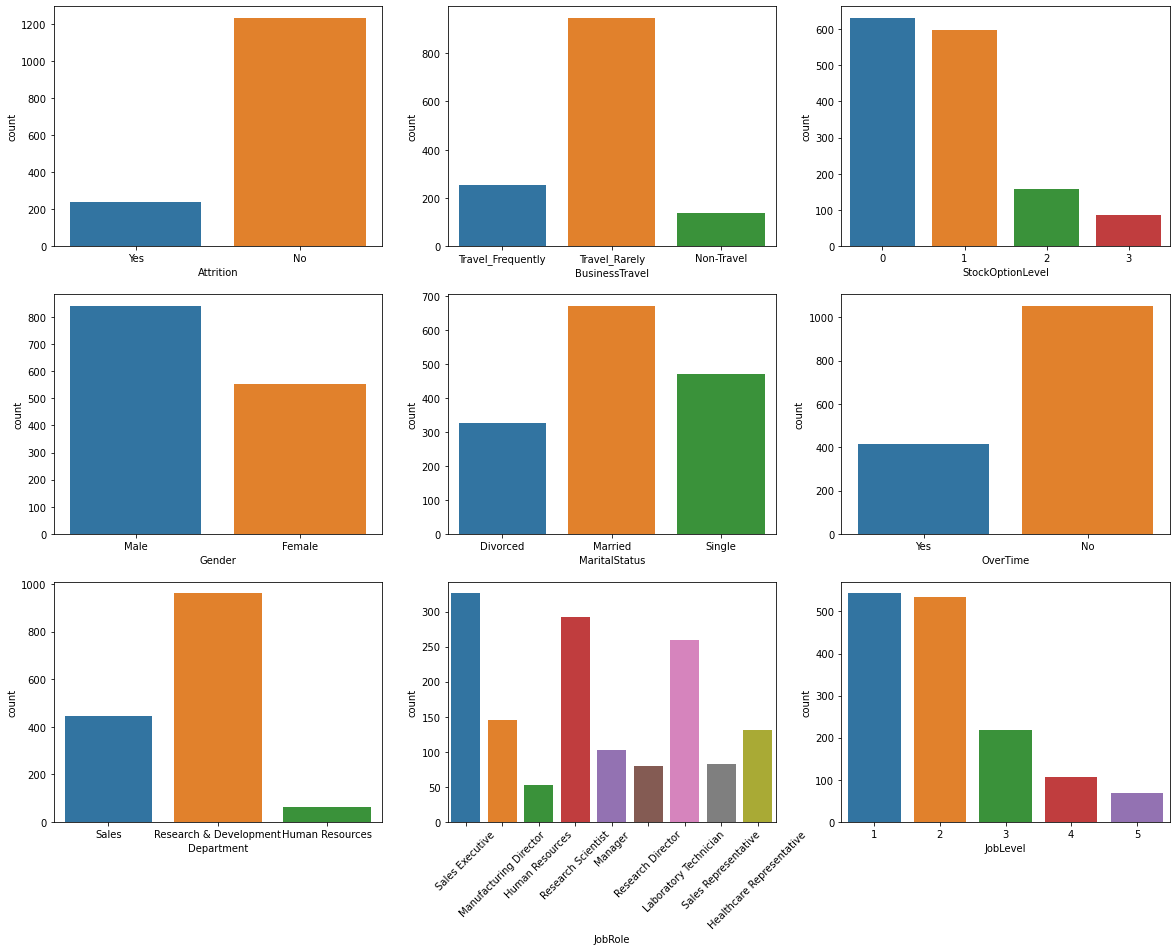

In [8]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="Attrition", data=df)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="BusinessTravel", data=df)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="StockOptionLevel", data=df)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x="Gender", data=df)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x="MaritalStatus", data=df)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.countplot(x="OverTime", data=df)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.countplot(x="Department", data=df)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.countplot(x="JobRole", data=df)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.countplot(x="JobLevel", data=df)

plt.show()

## Assesing missing values and Data cleaning

### Missing values will be substitute with the mean and mode jobroles

In [9]:
# Getting job roles departments
jobroles = df["JobRole"].unique()

for jr in jobroles:
    my_set = set()
    for row in df[df["JobRole"] == jr]["Department"]:
        my_set.add(row)
    print(jr, my_set, sep="\t")

Sales Executive	{'Sales'}
Manufacturing Director	{'Research & Development'}
Human Resources	{'Human Resources'}
Research Scientist	{'Research & Development'}
Manager	{'Sales', 'Research & Development', 'Human Resources'}
Research Director	{'Research & Development'}
Laboratory Technician	{'Research & Development'}
Sales Representative	{'Sales'}
Healthcare Representative	{'Research & Development'}


In [10]:
# getting job roles educations
jobroles = df["JobRole"].unique()

for jr in jobroles:
    my_set = set()
    for row in df[df["JobRole"] == jr]["EducationField"]:
        my_set.add(row)
    print(jr, my_set, sep="\t")

Sales Executive	{'Life Sciences', 'Medical', 'Marketing', 'Other', 'Technical Degree'}
Manufacturing Director	{'Life Sciences', 'Medical', 'Other', 'Technical Degree'}
Human Resources	{'Life Sciences', 'Medical', 'Other', 'Human Resources', 'Technical Degree'}
Research Scientist	{'Medical', 'Life Sciences', 'Other', 'Technical Degree'}
Manager	{'Life Sciences', 'Medical', 'Marketing', 'Other', 'Human Resources', 'Technical Degree'}
Research Director	{'Life Sciences', 'Medical', 'Other', 'Technical Degree'}
Laboratory Technician	{'Medical', 'Life Sciences', 'Other', 'Technical Degree'}
Sales Representative	{'Life Sciences', 'Medical', 'Marketing', 'Other', 'Technical Degree'}
Healthcare Representative	{'Life Sciences', 'Medical', 'Other', 'Technical Degree'}


In [11]:
# MEAN
df.groupby('JobRole').mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,38.027523,854.251908,9.786260,2.992366,2.770992,66.839695,2.732824,2.473282,2.786260,6627.723214,14400.198473,2.908397,15.450382,3.157895,2.694656,80.0,0.832061,14.068702,2.920792,2.702290,5.833333,4.862595,2.969466,4.572519
Human Resources,36.521739,757.923077,8.173077,2.884615,2.596154,64.173077,2.711538,1.480769,2.557692,6749.209302,13292.403846,2.961538,14.807692,3.187500,2.961538,80.0,0.750000,8.173077,2.604651,2.923077,7.372549,3.134615,1.269231,3.173077
Laboratory Technician,37.243363,796.617761,9.409266,2.772201,2.718147,66.683398,2.694981,1.239382,2.691120,6365.148515,14066.061776,2.579151,15.046332,3.144737,2.687259,80.0,0.818533,7.656371,2.769231,2.718147,6.897959,3.200772,1.420849,3.297297
Manager,37.579545,782.950980,8.029412,3.019608,2.764706,66.833333,2.774510,4.303922,2.705882,6216.988636,15139.578431,3.078431,15.137255,3.168421,2.813725,80.0,0.745098,24.549020,2.625000,2.774510,7.298969,6.450980,4.833333,6.274510
Manufacturing Director,36.626866,796.020690,9.482759,2.896552,2.917241,65.006897,2.682759,2.448276,2.682759,6619.580357,14478.965517,2.765517,15.593103,3.162602,2.724138,80.0,0.813793,12.786207,2.808696,2.765517,6.489051,4.972414,2.117241,4.944828
Research Director,38.838235,802.450000,8.437500,3.125000,2.500000,63.762500,2.775000,3.975000,2.700000,7261.843750,15080.550000,3.712500,14.950000,3.136986,2.687500,80.0,0.850000,21.400000,2.870968,2.862500,8.565789,6.287500,3.187500,6.075000
Research Scientist,37.008299,800.359589,9.013699,2.914384,2.726027,66.708904,2.797945,1.202055,2.773973,7116.206751,13927.113014,2.472603,15.448630,3.133080,2.705479,80.0,0.773973,7.715753,2.858369,2.678082,7.475177,3.273973,1.506849,3.208904
Sales Executive,36.366300,802.098160,9.659509,3.015337,2.671779,65.438650,2.714724,2.328221,2.754601,6062.403774,14471.110429,2.720859,14.889571,3.176678,2.702454,80.0,0.819018,11.101227,2.804511,2.803681,6.833333,4.855828,2.484663,4.677914
Sales Representative,37.616438,811.349398,8.662651,2.530120,2.734940,64.337349,2.650602,1.084337,2.734940,6397.089552,14278.204819,1.626506,15.674699,3.126761,2.602410,80.0,0.626506,4.674699,2.928571,2.891566,5.842105,2.012048,1.060241,1.662651


In [12]:
# MODE
df.groupby(['JobRole']).agg(lambda x:x.value_counts().index[0])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,35.0,No,Travel_Rarely,1495,Research & Development,1,3,Life Sciences,3,Male,30,3,2,3,Married,3452.0,9262,1,Y,No,12,3.0,4,80.0,1,10,3.0,3,1.0,7,0,2
Human Resources,43.0,No,Travel_Rarely,528,Human Resources,2,3,Human Resources,3,Male,52,3,1,2,Married,2029.0,3072,1,Y,No,11,3.0,3,80.0,0,6,3.0,3,2.0,2,0,2
Laboratory Technician,34.0,No,Travel_Rarely,329,Research & Development,2,3,Life Sciences,4,Male,79,3,1,4,Married,3420.0,7324,1,Y,No,13,3.0,3,80.0,1,10,2.0,3,10.0,2,0,2
Manager,30.0,No,Travel_Rarely,117,Research & Development,2,3,Life Sciences,4,Male,88,3,4,4,Married,10686.0,13829,1,Y,No,11,3.0,4,80.0,1,21,2.0,3,5.0,0,0,7
Manufacturing Director,35.0,No,Travel_Rarely,556,Research & Development,1,3,Life Sciences,4,Male,60,3,2,3,Married,4148.0,13934,1,Y,No,11,3.0,3,80.0,1,10,2.0,3,5.0,2,0,2
Research Director,40.0,No,Travel_Rarely,1115,Research & Development,1,3,Life Sciences,1,Male,42,3,3,3,Married,2821.0,8733,3,Y,No,14,3.0,3,80.0,0,21,2.0,3,5.0,2,0,7
Research Scientist,28.0,No,Travel_Rarely,408,Research & Development,1,3,Life Sciences,4,Male,72,3,1,4,Married,3038.0,25326,1,Y,No,13,3.0,4,80.0,0,6,2.0,3,5.0,2,0,2
Sales Executive,38.0,No,Travel_Rarely,906,Sales,1,3,Marketing,3,Male,32,3,2,4,Married,2741.0,11591,1,Y,No,14,3.0,4,80.0,0,10,2.0,3,5.0,7,0,7
Sales Representative,40.0,No,Travel_Rarely,895,Sales,2,3,Life Sciences,3,Male,54,3,1,3,Single,4968.0,9150,1,Y,No,13,3.0,3,80.0,0,1,3.0,3,1.0,2,0,2


In [13]:
def change_na(df):
    "function to substitute the NaN with the mean (in case of numerical variables) or mode 8in cas eof categorical variables) per Job Role"
    for col in df.columns:
        if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
            df[col] = df[col].fillna(df.groupby('JobRole')[col].transform('mean'))
        else:
            if df[col].dtypes == 'object':
                df[col] = df.groupby(['JobRole'], sort=False)[col].apply(lambda x: x.fillna(x.mode().iloc[0])) 
change_na(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [15]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

### outliers

#### Boxplot to visualize outliers

<AxesSubplot:ylabel='YearsWithCurrManager'>

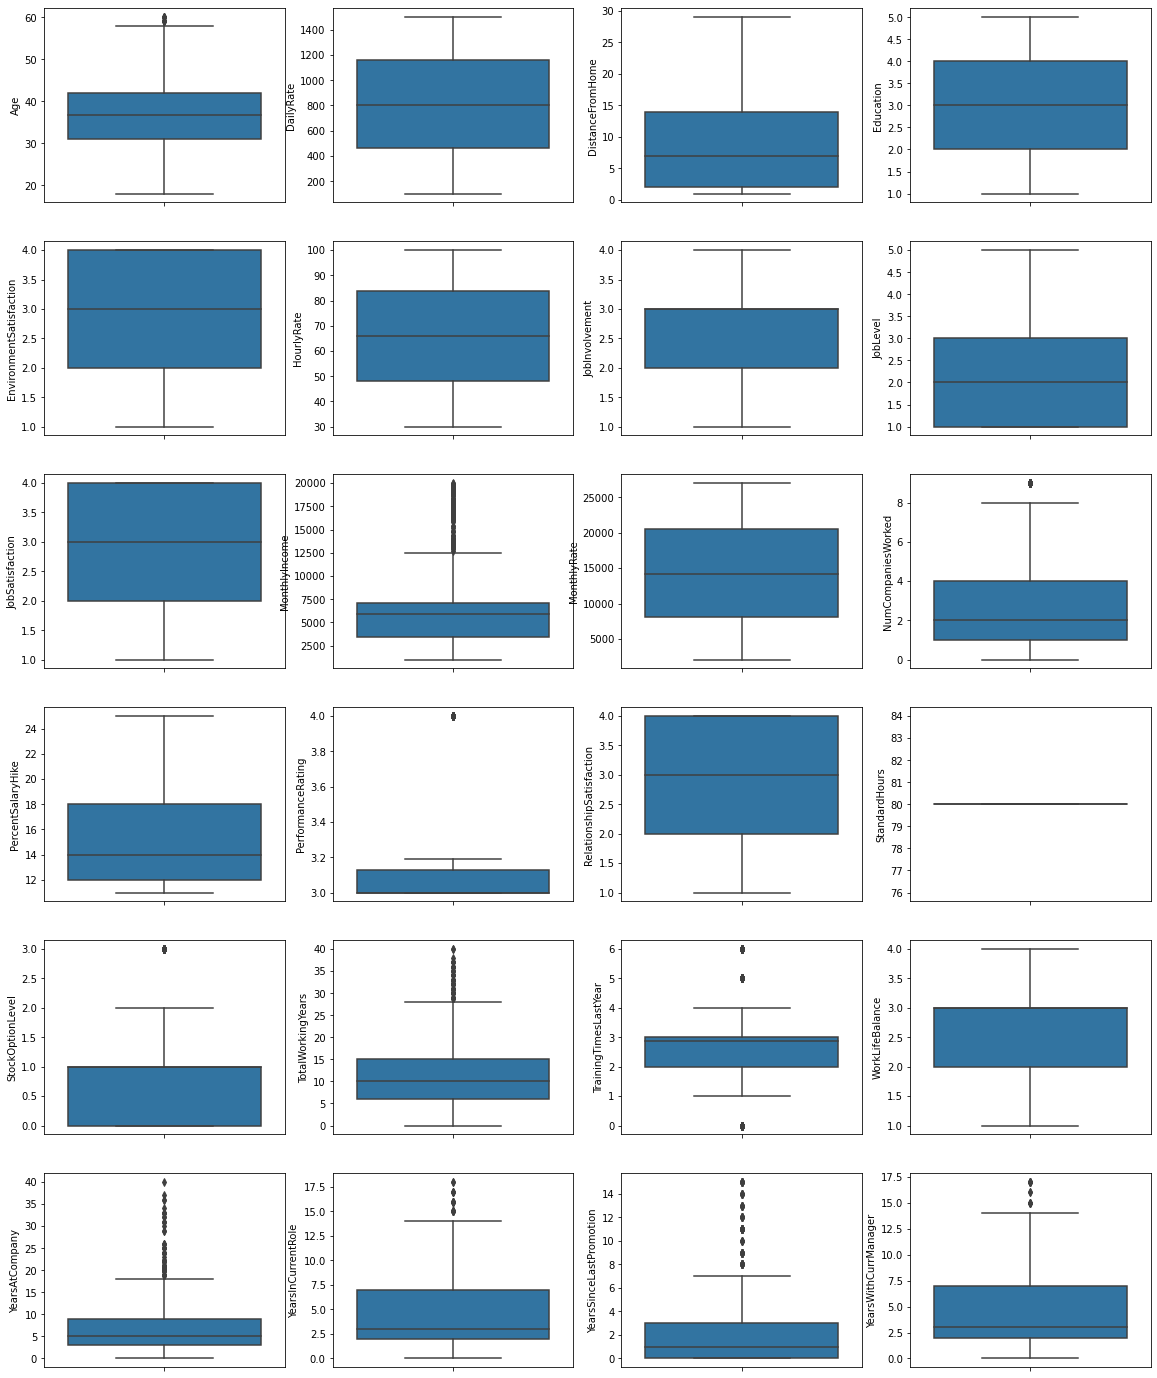

In [16]:
fig = plt.figure(figsize = (25, 25)) 
fig_dims = (6,5)

plt.subplot2grid(fig_dims, (0, 0))
sns.boxplot(y = df['Age'])

plt.subplot2grid(fig_dims, (0, 1))
sns.boxplot(y = df['DailyRate'])

plt.subplot2grid(fig_dims, (0, 2))
sns.boxplot(y = df['DistanceFromHome'])

plt.subplot2grid(fig_dims, (0, 3))
sns.boxplot(y = df['Education'])

plt.subplot2grid(fig_dims, (1, 0))
sns.boxplot(y = df['EnvironmentSatisfaction'])

plt.subplot2grid(fig_dims, (1, 1))
sns.boxplot(y = df['HourlyRate'])

plt.subplot2grid(fig_dims, (1, 2))
sns.boxplot(y = df['JobInvolvement'])

plt.subplot2grid(fig_dims, (1, 3))
sns.boxplot(y = df['JobLevel'])

plt.subplot2grid(fig_dims, (2, 0))
sns.boxplot(y = df['JobSatisfaction'])

plt.subplot2grid(fig_dims, (2, 1))
sns.boxplot(y = df['MonthlyIncome'])

plt.subplot2grid(fig_dims, (2, 2))
sns.boxplot(y = df['MonthlyRate'])

plt.subplot2grid(fig_dims, (2, 3))
sns.boxplot(y = df['NumCompaniesWorked'])

plt.subplot2grid(fig_dims, (3, 0))
sns.boxplot(y = df['PercentSalaryHike'])

plt.subplot2grid(fig_dims, (3, 1))
sns.boxplot(y = df['PerformanceRating'])

plt.subplot2grid(fig_dims, (3, 2))
sns.boxplot(y = df['RelationshipSatisfaction'])

plt.subplot2grid(fig_dims, (3, 3))
sns.boxplot(y = df['StandardHours'])

plt.subplot2grid(fig_dims, (4, 0))
sns.boxplot(y = df['StockOptionLevel'])

plt.subplot2grid(fig_dims, (4, 1))
sns.boxplot(y = df['TotalWorkingYears'])

plt.subplot2grid(fig_dims, (4, 2))
sns.boxplot(y = df['TrainingTimesLastYear'])

plt.subplot2grid(fig_dims, (4, 3))
sns.boxplot(y = df['WorkLifeBalance'])

plt.subplot2grid(fig_dims, (5, 0))
sns.boxplot(y = df['YearsAtCompany'])

plt.subplot2grid(fig_dims, (5, 1))
sns.boxplot(y = df['YearsInCurrentRole'])

plt.subplot2grid(fig_dims, (5, 2))
sns.boxplot(y = df['YearsSinceLastPromotion'])

plt.subplot2grid(fig_dims, (5, 3))
sns.boxplot(y = df['YearsWithCurrManager'])

#### Outliers detection with z-score

In [17]:
#OUTLIERS FOR AGE

"""SD AGE"""
age_std = df ['Age'].std()
age_std

"""MEAN AGE"""
age_mean = df ['Age'].mean()
age_mean

threshold = 3
outlier = [] 
for i in df ['Age']: 
    z = (i-age_mean)/age_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in Age', outlier) 
 
 
#OUTLIERS FOR DAILY RATE

"""SD DAILYRATE"""
dailyrate_std = df ['DailyRate'].std()
dailyrate_std

"""MEAN AGE"""
dailyrate_mean = df ['DailyRate'].mean()
dailyrate_mean

threshold = 3
outlier = [] 
for i in df ['DailyRate']: 
    z = (i-dailyrate_mean)/dailyrate_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in DailyRate', outlier) 
 

#OUTLIERS FOR DISTANCE FROM HOME

"""SD DistanceFromHome"""
DistanceFromHome_std = df ['DistanceFromHome'].std()
DistanceFromHome_std

"""MEAN DistanceFromHome"""
DistanceFromHome_mean = df ['DistanceFromHome'].mean()
DistanceFromHome_mean

threshold = 3
outlier = [] 
for i in df ['DistanceFromHome']: 
    z = (i-DistanceFromHome_mean)/DistanceFromHome_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in DistanceFromHome', outlier)
 
 
#OUTLIERS FOR EDUCATION

"""SD Education"""
Education_std = df ['Education'].std()
Education_std

"""MEAN Education"""
Education_mean = df ['Education'].mean()
Education_mean

threshold = 3
outlier = [] 
for i in df ['Education']: 
    z = (i-Education_mean)/Education_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in Education', outlier)
 
 
#OUTLIERS FOR HOURLYRATE

"""SD HourlyRate"""
HourlyRate_std = df ['HourlyRate'].std()
HourlyRate_std

"""MEAN HourlyRate"""
HourlyRate_mean = df ['HourlyRate'].mean()
HourlyRate_mean

threshold = 3
outlier = [] 
for i in df ['HourlyRate']: 
    z = (i-HourlyRate_mean)/HourlyRate_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in HourlyRate', outlier)
 
 
#OUTLIERS FOR MonthlyIncome

"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std

"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean

threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in MonthlyIncome', outlier)
 
 
#OUTLIERS FOR MonthlyRate

"""SD MonthlyRate"""
MonthlyRate_std = df ['MonthlyRate'].std()
MonthlyRate_std

"""MEAN MonthlyRate"""
MonthlyRate_mean = df ['MonthlyRate'].mean()
MonthlyRate_mean

threshold = 3
outlier = [] 
for i in df ['MonthlyRate']: 
    z = (i-MonthlyRate_mean)/MonthlyRate_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in MonthlyRate', outlier)
  

#OUTLIERS FOR NumCompaniesWorked

"""SD NumCompaniesWorked"""
NumCompaniesWorked_std = df ['NumCompaniesWorked'].std()
NumCompaniesWorked_std

"""MEAN NumCompaniesWorked"""
NumCompaniesWorked_mean = df ['NumCompaniesWorked'].mean()
NumCompaniesWorked_mean

threshold = 3
outlier = [] 
for i in df ['NumCompaniesWorked']: 
    z = (i-NumCompaniesWorked_mean)/NumCompaniesWorked_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in NumCompaniesWorked', outlier)
 
 
#OUTLIERS FOR PercentSalaryHike

"""SD PercentSalaryHike"""
PercentSalaryHike_std = df ['PercentSalaryHike'].std()

"""MEAN PercentSalaryHike"""
PercentSalaryHike_mean = df ['PercentSalaryHike'].mean()

threshold = 3
outlier = [] 
for i in df ['PercentSalaryHike']: 
    z = (i-PercentSalaryHike_mean)/PercentSalaryHike_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in PercentSalaryHike', outlier)
 
 
#OUTLIERS FOR PerformanceRating

"""SD PerformanceRating"""
PerformanceRating_std = df ['PerformanceRating'].std()

"""MEAN PerformanceRating"""
PerformanceRating_mean = df ['PerformanceRating'].mean()

threshold = 3
outlier = [] 
for i in df ['PerformanceRating']: 
    z = (i-PerformanceRating_mean)/PerformanceRating_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in PerformanceRating', outlier)
 
 
#OUTLIERS FOR RelationshipSatisfaction

"""SD RelationshipSatisfaction"""
RelationshipSatisfaction_std = df ['RelationshipSatisfaction'].std()

"""MEAN RelationshipSatisfaction"""
RelationshipSatisfaction_mean = df ['RelationshipSatisfaction'].mean()

threshold = 3
outlier = [] 
for i in df ['RelationshipSatisfaction']: 
    z = (i-RelationshipSatisfaction_mean)/RelationshipSatisfaction_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in RelationshipSatisfaction', outlier)
 
 
#OUTLIERS FOR StockOptionLevel

"""SD StockOptionLevel"""
StockOptionLevel_std = df ['StockOptionLevel'].std()

"""MEAN StockOptionLevel"""
StockOptionLevel_mean = df ['StockOptionLevel'].mean()

threshold = 3
outlier = [] 
for i in df ['StockOptionLevel']: 
    z = (i-StockOptionLevel_mean)/StockOptionLevel_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in StockOptionLevel', outlier)
 

#OUTLIERS FOR TotalWorkingYears

"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()

"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()

threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in TotalWorkingYears', outlier)
 

#OUTLIERS FOR TrainingTimesLastYear

"""SD TrainingTimesLastYear"""
TrainingTimesLastYear_std = df ['TrainingTimesLastYear'].std()

"""MEAN TrainingTimesLastYear"""
TrainingTimesLastYear_mean = df ['TrainingTimesLastYear'].mean()

threshold = 3
outlier = [] 
for i in df ['TrainingTimesLastYear']: 
    z = (i-TrainingTimesLastYear_mean)/TrainingTimesLastYear_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in TrainingTimesLastYear', outlier)
 
 
#OUTLIERS FOR YearsAtCompany

"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()

"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsAtCompany', outlier)
 
 
#OUTLIERS FOR YearsInCurrentRole

"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()

"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsInCurrentRole', outlier)
 
 
#OUTLIERS FOR YearsSinceLastPromotion

"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()

"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsSinceLastPromotion', outlier)
 
 
#OUTLIERS FOR YearsWithCurrManager

"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()

"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
print('outlier in YearsWithCurrManager', outlier)

outlier in Age []
outlier in DailyRate []
outlier in DistanceFromHome []
outlier in Education []
outlier in HourlyRate []
outlier in MonthlyIncome [19436.0, 19847.0, 19636.0, 19943.0, 19627.0, 19701.0, 19545.0, 19502.0, 19431.0, 19740.0, 19419.0, 19845.0, 19999.0, 19926.0, 19833.0, 19406.0, 19537.0, 19658.0, 19859.0, 19586.0, 19665.0, 19717.0, 19517.0]
outlier in MonthlyRate []
outlier in NumCompaniesWorked []
outlier in PercentSalaryHike []
outlier in PerformanceRating []
outlier in RelationshipSatisfaction []
outlier in StockOptionLevel []
outlier in TotalWorkingYears [38, 40, 35, 37, 40, 35, 37, 36, 36, 36, 36, 37, 37, 35, 36, 36]
outlier in TrainingTimesLastYear []
outlier in YearsAtCompany [29.0, 36.0, 25.0, 26.0, 34.0, 31.0, 31.0, 31.0, 29.0, 32.0, 40.0, 33.0, 26.0, 32.0, 25.0, 25.0, 37.0, 36.0, 26.0, 25.0, 30.0, 33.0, 33.0, 33.0]
outlier in YearsInCurrentRole [18, 17, 17, 17, 16, 18, 16, 17, 16, 16, 16, 16, 16]
outlier in YearsSinceLastPromotion [15, 12, 15, 13, 12, 15, 12, 15, 

##### The outliers in MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager will be removed since they are detected by both baxplot method and Z-score

In [18]:
#OUTLIERS FOR MonthlyIncome

"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std

"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean

threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears

"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()

"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()

threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]


#OUTLIERS FOR YearsAtCompany

"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()

"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole

"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()

"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
 
#OUTLIERS FOR YearsSinceLastPromotion

"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()

"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
 
#OUTLIERS FOR YearsWithCurrManager

"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()

"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()

threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]

In [19]:
print('removed outliers: ', 1176 - len(df))
len(df)

removed outliers:  -170


1346

In [71]:
df.to_csv(r'employees_attrition_clean.csv', index = False)
print('DataFrame is written to csv successfully.')

DataFrame is written to csv successfully.


*Distribution of the variable target Attrition*

**RESULTS: Imbalanced data: 17% have left job, 83% have stayed**

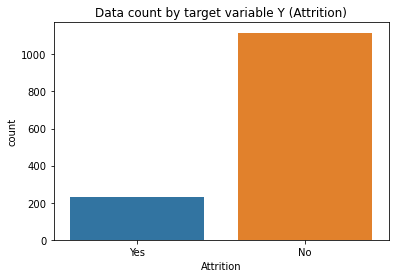

<ipython-input-20-fa0bff899710>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


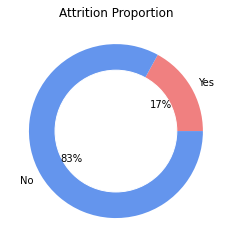

In [20]:
# Checking data imbalance
sns.countplot(x=df['Attrition'])
plt.title('Data count by target variable Y (Attrition)')
plt.show()

#RESULTS: Imbalanced data: 17% have left job, 83% have stayed

Y_count = len(df[df['Attrition'] == 'Yes'])
N_count = len(df[df['Attrition'] == 'No'])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

**Variable statisticl description**

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1346.0,36.685703,8.162643,18.0,31.00,36.366300,41.000000,60.0
DailyRate,1346.0,804.995542,402.740761,102.0,467.25,805.500000,1157.000000,1498.0
DistanceFromHome,1346.0,9.105498,8.062535,1.0,2.00,7.000000,13.000000,29.0
Education,1346.0,2.890788,1.027845,1.0,2.00,3.000000,4.000000,5.0
EnvironmentSatisfaction,1346.0,2.731055,1.086806,1.0,2.00,3.000000,4.000000,4.0
HourlyRate,1346.0,65.752600,20.289001,30.0,48.00,66.000000,83.000000,100.0
JobInvolvement,1346.0,2.728083,0.714418,1.0,2.00,3.000000,3.000000,4.0
JobLevel,1346.0,1.966568,1.025872,1.0,1.00,2.000000,2.000000,5.0
JobSatisfaction,1346.0,2.739970,1.103219,1.0,2.00,3.000000,4.000000,4.0
MonthlyIncome,1346.0,6220.370900,3801.879454,1009.0,3423.25,5744.500000,7116.206751,19331.0


---

### Variables distribution

<ipython-input-22-bd165ace681e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(edgecolor='black' , ax=ax , linewidth=1.2)


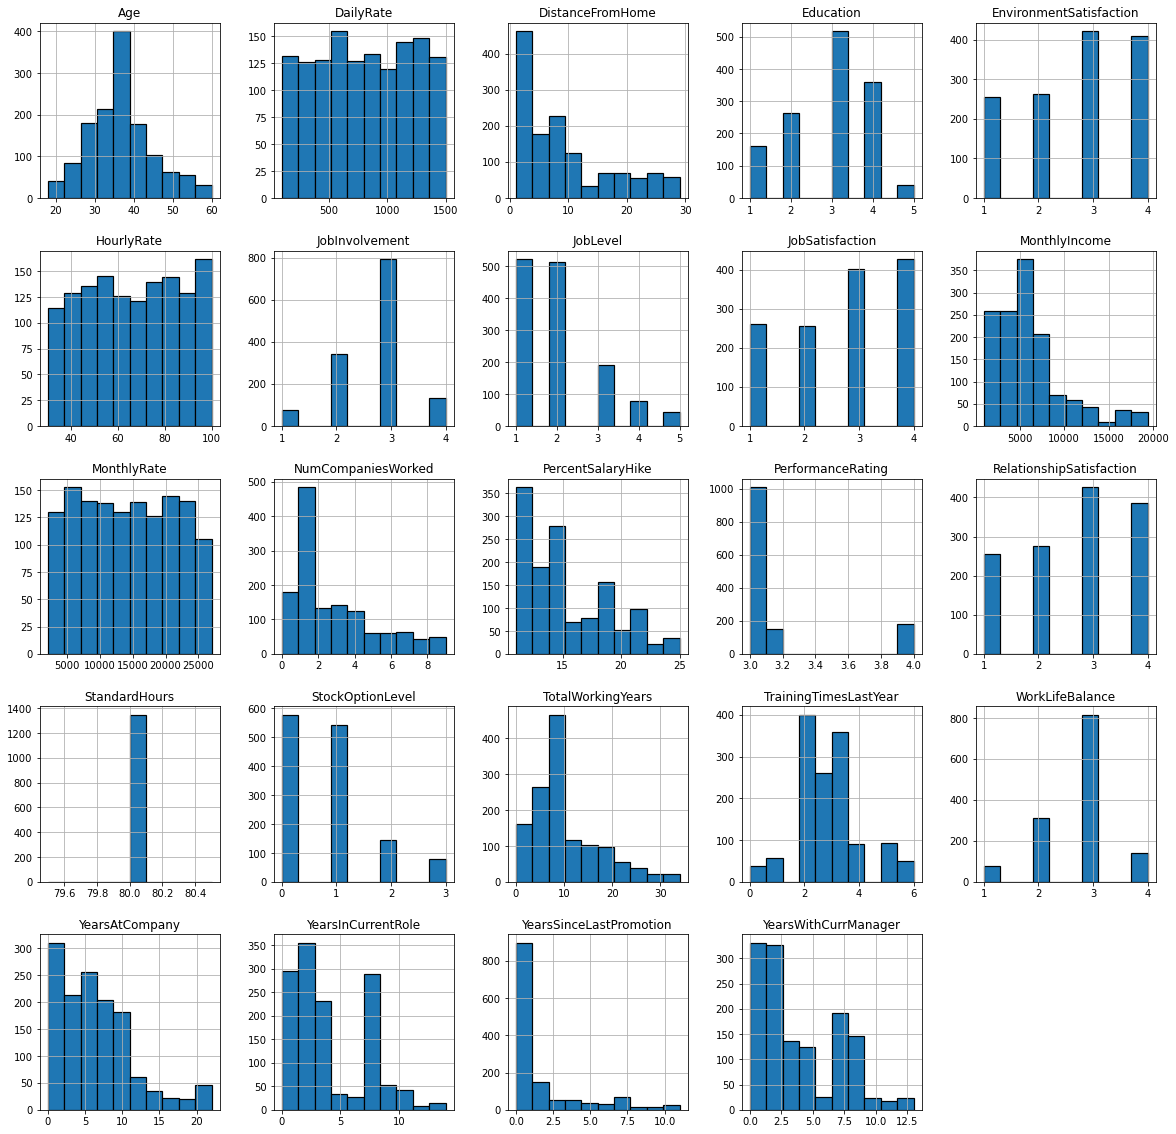

In [22]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(edgecolor='black' , ax=ax , linewidth=1.2)
plt.ylabel('Count')
plt.show()

**Variable distribution categorical data**

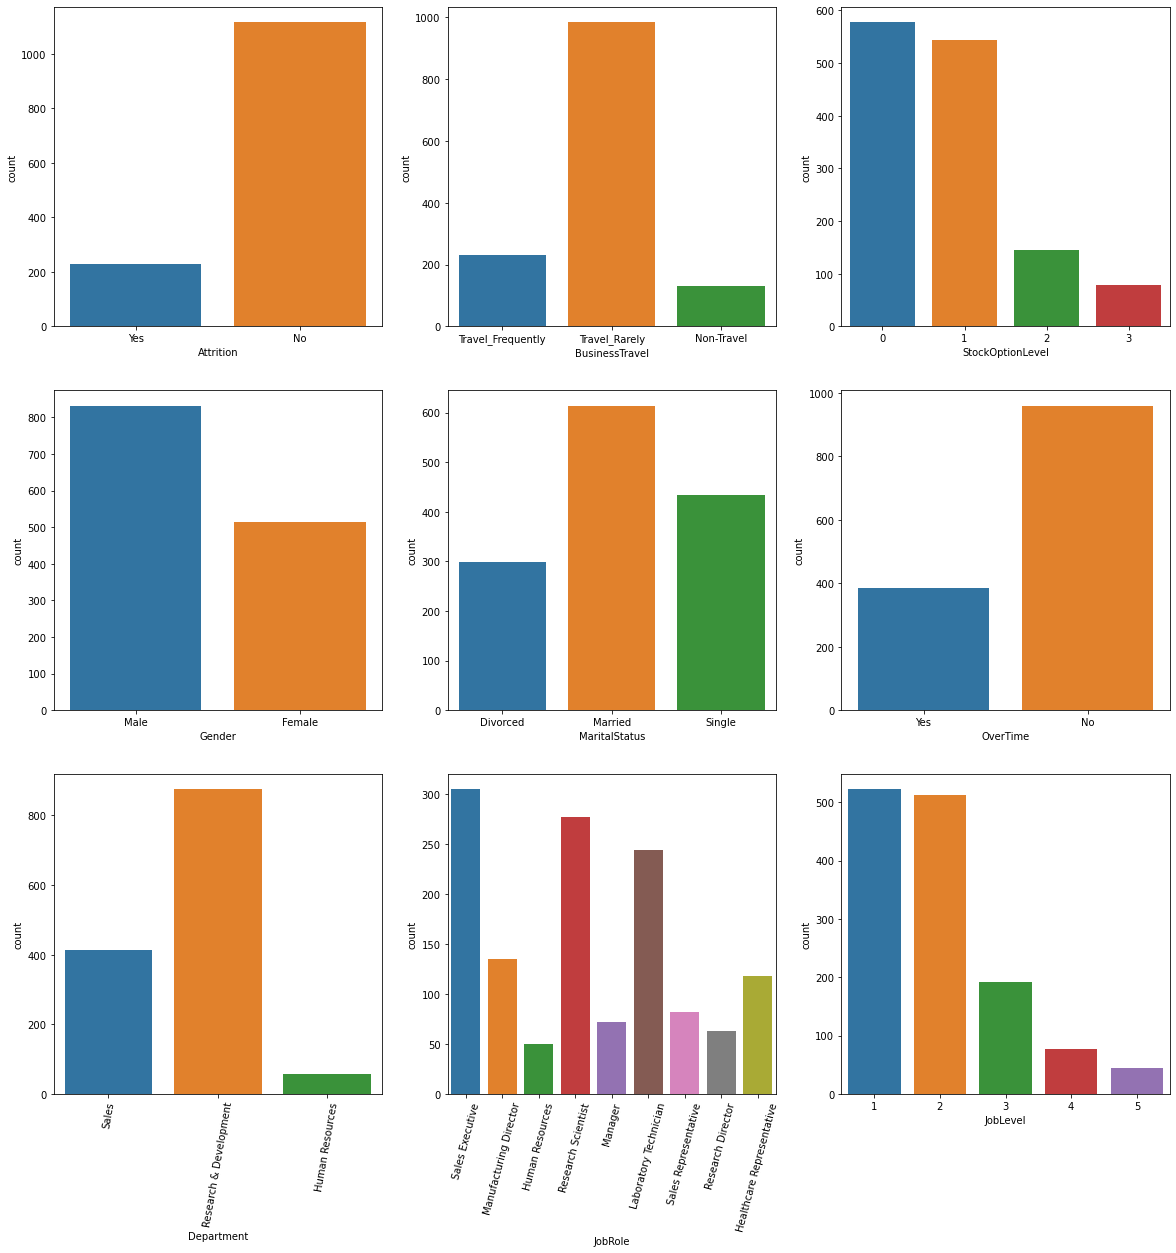

In [23]:
fig = plt.subplots(figsize=(20, 20))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="Attrition", data=df)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="BusinessTravel", data=df)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="StockOptionLevel", data=df)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x="Gender", data=df)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x="MaritalStatus", data=df)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.countplot(x="OverTime", data=df)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.countplot(x="Department", data=df)
plt.xticks(rotation= 80)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.countplot(x="JobRole", data=df)
plt.xticks(rotation=75)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.countplot(x="JobLevel", data=df)

plt.show()

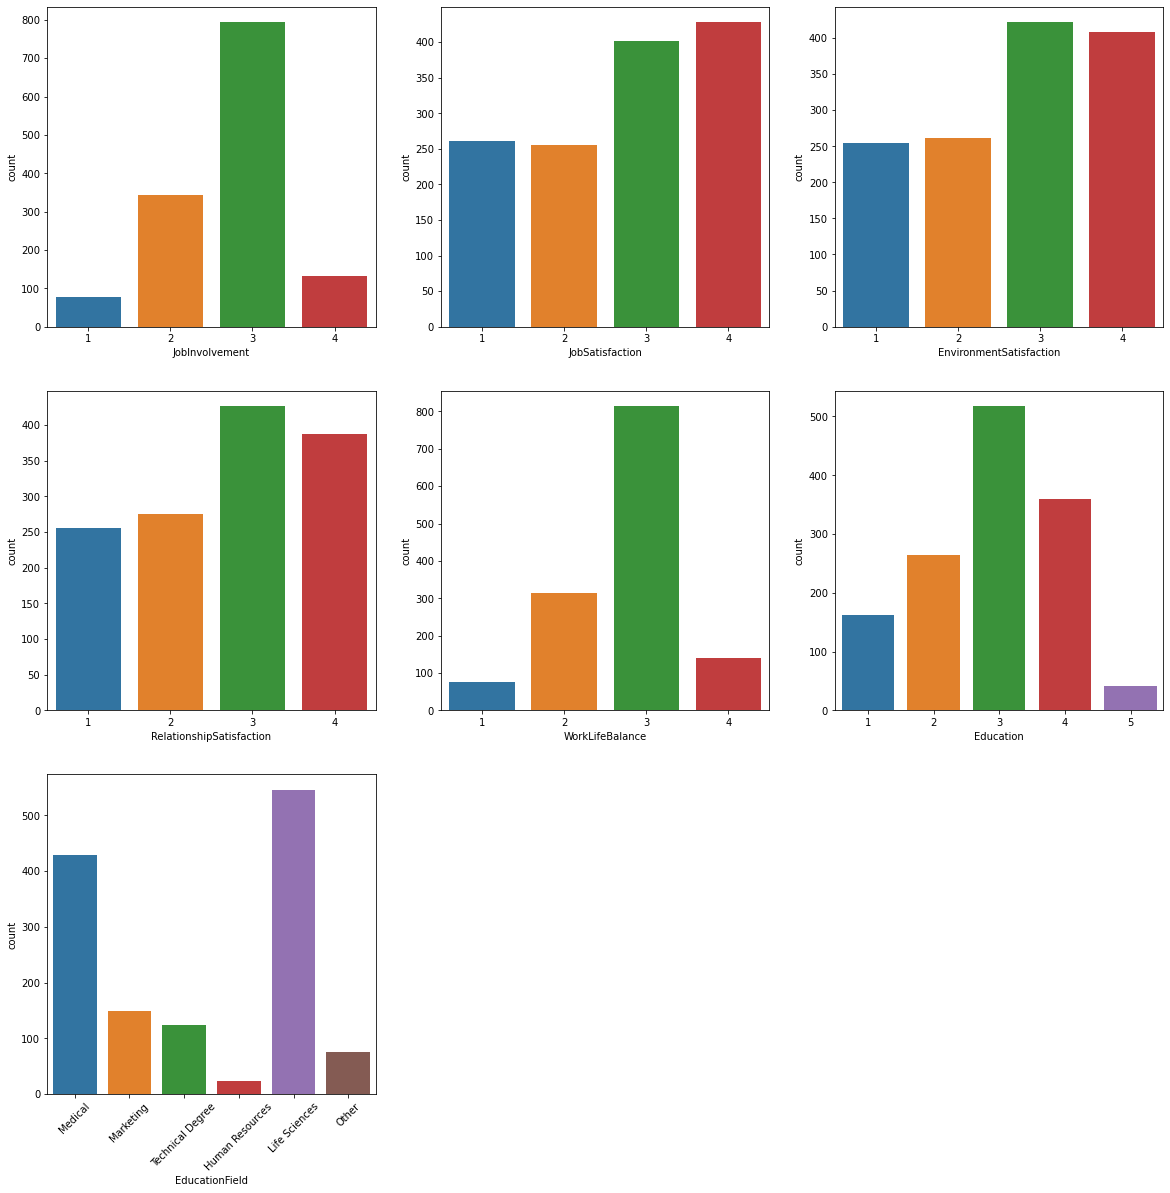

In [24]:
fig =plt.subplots(figsize=(20, 20))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="JobInvolvement", data=df)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="JobSatisfaction", data=df)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="EnvironmentSatisfaction", data=df)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x="RelationshipSatisfaction", data=df)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x="WorkLifeBalance", data=df)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.countplot(x="Education", data=df)


ax = plt.subplot2grid(fig_dims, (2, 0))
sns.countplot(x="EducationField", data=df)
plt.xticks(rotation=45)

plt.show()

**Visualization of the target variable "Attrition" among the variables**

/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Aless

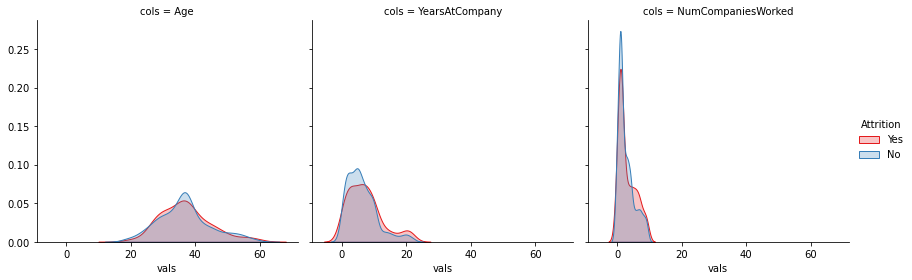

In [47]:
Age_YAC_NCW = df[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
#Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()

g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Aless

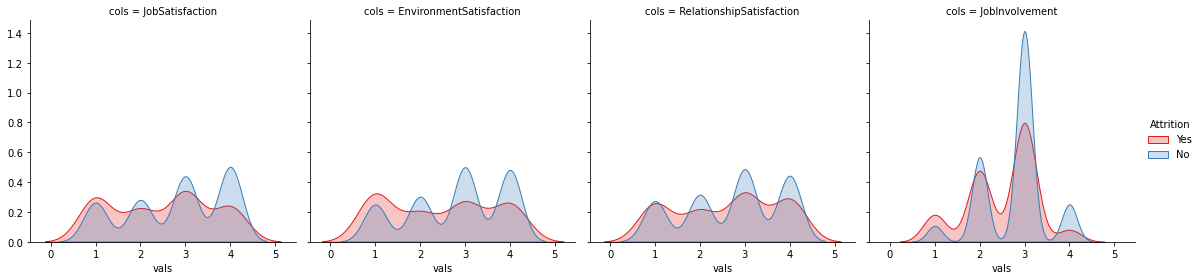

In [48]:
JS_ES_RS_JI = df[['JobSatisfaction','EnvironmentSatisfaction','RelationshipSatisfaction', 'JobInvolvement','Attrition']]
#Age_YAC_NCW.head()
JERJ_melt = JS_ES_RS_JI.melt(['Attrition'], var_name='cols',  value_name='vals')
#JERJ_melt.head()

g = sns.FacetGrid(JERJ_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/AlessandroVavala/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Aless

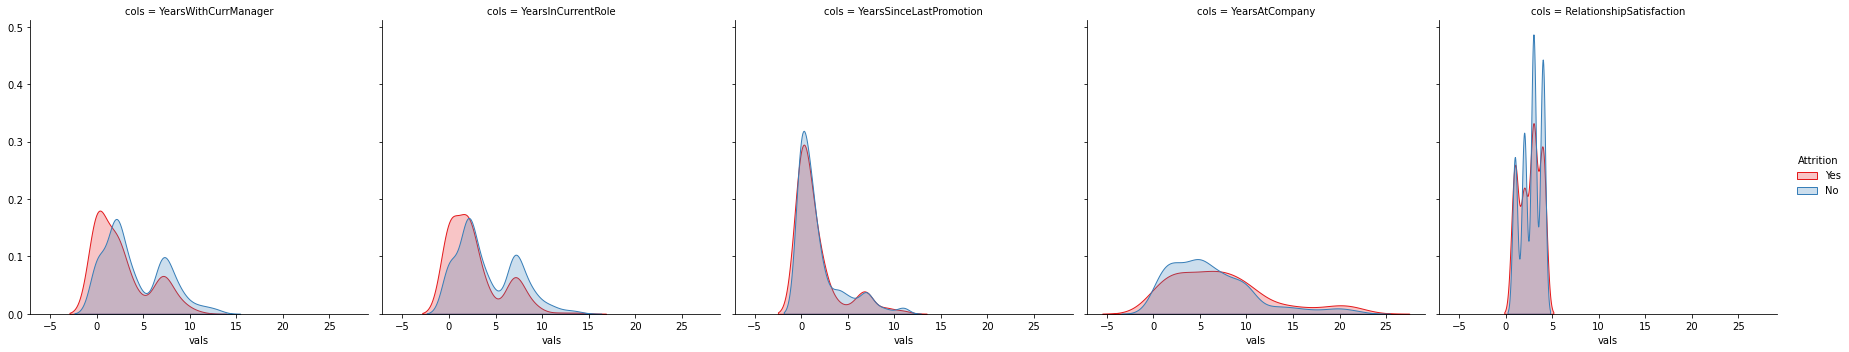

In [49]:
inthecompany = df[['YearsWithCurrManager','YearsInCurrentRole', 'YearsSinceLastPromotion' , 'YearsAtCompany', 'RelationshipSatisfaction','Attrition']]
#Age_YAC_NCW.head()
inthecompany_melt = inthecompany.melt(['Attrition'], var_name='cols',  value_name='vals')
#JERJ_melt.head()
g = sns.FacetGrid(inthecompany_melt, col='cols', hue="Attrition", palette="Set1",size=5)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

---

**Crosstabs**

Department and education

In [50]:
dep_edu = pd.crosstab(df['Department'], df['Education'])
dep_edu

Education,1,2,3,4,5
Department,,,,,
Human Resources,4,13,26,12,3
Research & Development,110,173,338,228,26
Sales,48,79,154,120,12


In [51]:
# Normalize the cross tab of EnviromentSatisfaction to sum to 1:
dep_edu_norm = dep_edu.div(dep_edu.sum(1).astype(float), axis=0)
dep_edu_norm

Education,1,2,3,4,5
Department,,,,,
Human Resources,0.068966,0.224138,0.448276,0.206897,0.051724
Research & Development,0.125714,0.197714,0.386286,0.260571,0.029714
Sales,0.116223,0.191283,0.372881,0.290557,0.029056


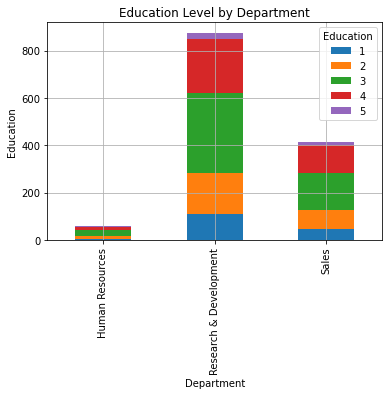

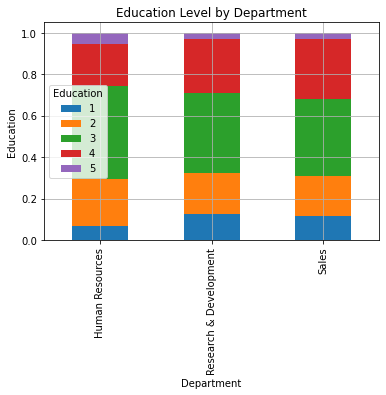

In [52]:
#chart not normalized of Department and education
dep_edu.plot(kind='bar', stacked=True, 
                   title='Education Level by Department')
plt.xlabel('Department')
plt.ylabel('Education')
plt.grid()
plt.show()


#chart normalized  of Department and Education
dep_edu_norm.plot(kind='bar', stacked=True, 
                   title='Education Level by Department')
plt.xlabel('Department')
plt.ylabel('Education')
plt.grid()
plt.show()

JobInvolvment and Attrition

In [53]:
#JobInvolvment and Attrition
invol_attr = pd.crosstab(df['JobInvolvement'], df['Attrition'])
invol_attr

Attrition,No,Yes
JobInvolvement,,
1,51,27
2,271,71
3,675,119
4,120,12


In [54]:
# Normalize the cross tab of JobInvolvement to sum to 1:
invol_attr_norm = invol_attr.div(invol_attr.sum(1).astype(float), axis=0)
invol_attr_norm

Attrition,No,Yes
JobInvolvement,,
1,0.653846,0.346154
2,0.792398,0.207602
3,0.850126,0.149874
4,0.909091,0.090909


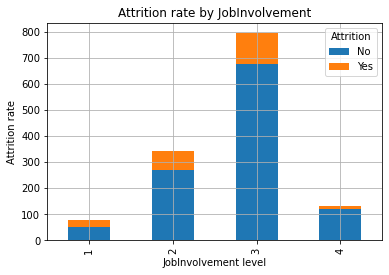

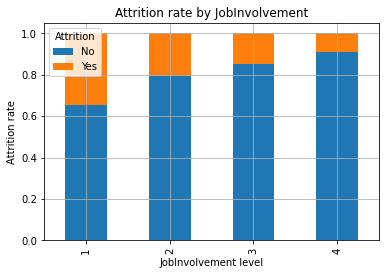

In [55]:
#chart non normalizzato
invol_attr.plot(kind='bar', stacked=True, 
                   title='Attrition rate by JobInvolvement')
plt.xlabel('JobInvolvement level')
plt.ylabel('Attrition rate')
plt.grid()
plt.show()

#chart normalizzato 
invol_attr_norm.plot(kind='bar', stacked=True, 
                   title='Attrition rate by JobInvolvement')
plt.xlabel('JobInvolvement level')
plt.ylabel('Attrition rate')
plt.grid()
plt.show()

Job involvment and Attrition

In [56]:
joblevel_attr = pd.crosstab(df['JobLevel'], df['Attrition'])
joblevel_attr

Attrition,No,Yes
JobLevel,,
1,380,142
2,460,52
3,162,29
4,74,3
5,41,3


In [57]:
# Normalize the cross tab of JobLevel to sum to 1:
joblevel_attr_norm = joblevel_attr.div(joblevel_attr.sum(1).astype(float), axis=0)
joblevel_attr_norm

Attrition,No,Yes
JobLevel,,
1,0.727969,0.272031
2,0.898438,0.101562
3,0.848168,0.151832
4,0.961039,0.038961
5,0.931818,0.068182


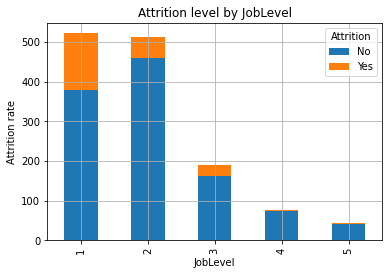

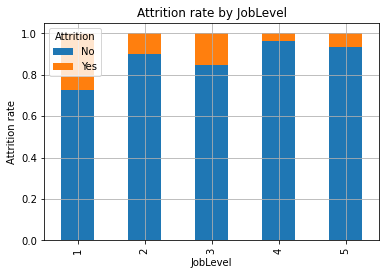

In [58]:
#chart NON NORMALIZZATO  per job level
joblevel_attr.plot(kind='bar', stacked=True, 
                   title='Attrition level by JobLevel')
plt.xlabel('JobLevel')
plt.ylabel('Attrition rate')
plt.grid()
plt.show()

#chart normalizzato 
joblevel_attr_norm.plot(kind='bar', stacked=True, 
                   title='Attrition rate by JobLevel')
plt.xlabel('JobLevel')
plt.ylabel('Attrition rate')
plt.grid()
plt.show()

Department and Attrition

In [59]:
# Department and Attrition
dep_attr = pd.crosstab(df['Department'], df['Attrition'])
print(dep_attr)

# Normalize the cross tab of Department to sum to 1:
dep_attr_norm = dep_attr.div(dep_attr.sum(1).astype(float), axis=0)
dep_attr_norm

Attrition                No  Yes
Department                      
Human Resources          46   12
Research & Development  747  128
Sales                   324   89


Attrition,No,Yes
Department,,
Human Resources,0.793103,0.206897
Research & Development,0.853714,0.146286
Sales,0.784504,0.215496


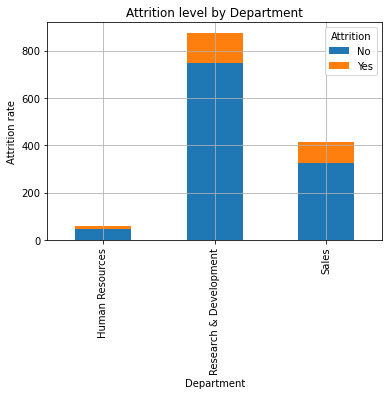

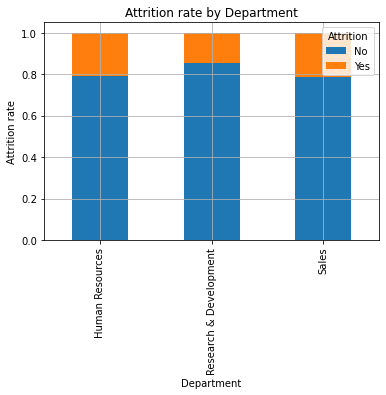

In [60]:
#chart NON NORMALIZZATO
dep_attr.plot(kind='bar', stacked=True, 
                   title='Attrition level by Department')
plt.xlabel('Department')
plt.ylabel('Attrition rate')
plt.grid()
plt.show()

#chart normalizzato 
dep_attr_norm.plot(kind='bar', stacked=True, 
                   title='Attrition rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition rate')
plt.grid()
plt.show()

Education and Attrition

In [61]:
# Education and Attrition
edu_attr = pd.crosstab(df['Education'], df['Attrition'])
print(dep_attr)

# Normalize the cross tab of education to sum to 1:
edu_attr_norm = edu_attr.div(edu_attr.sum(1).astype(float), axis=0)
edu_attr_norm

Attrition                No  Yes
Department                      
Human Resources          46   12
Research & Development  747  128
Sales                   324   89


Attrition,No,Yes
Education,,
1,0.814815,0.185185
2,0.833962,0.166038
3,0.816602,0.183398
4,0.847222,0.152778
5,0.878049,0.121951


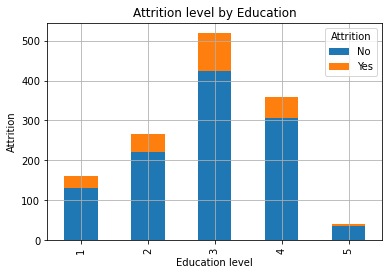

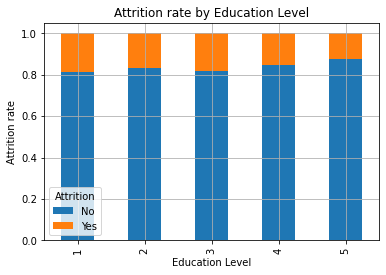

In [62]:
#chart NON NORMALIZZATO  per education
edu_attr.plot(kind='bar', stacked=True, 
                   title='Attrition level by Education')
plt.xlabel('Education level')
plt.ylabel('Attrition')
plt.grid()
plt.show()

#chart normalizzato 
edu_attr_norm.plot(kind='bar', stacked=True, 
                   title='Attrition rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition rate')
plt.grid()
plt.show()

Education and Job level

In [63]:
# Education and JobLevel
edu_joblevel = pd.crosstab(df['Education'], df['JobLevel'])
edu_joblevel

# Normalize the cross tab of education to sum to 1:
edu_joblevel_norm = edu_joblevel.div(edu_joblevel.sum(1).astype(float), axis=0)
edu_joblevel_norm

JobLevel,1,2,3,4,5
Education,,,,,
1,0.537037,0.283951,0.104938,0.043210,0.030864
2,0.354717,0.449057,0.105660,0.056604,0.033962
3,0.422780,0.316602,0.162162,0.061776,0.036680
4,0.316667,0.455556,0.147222,0.052778,0.027778
5,0.195122,0.463415,0.219512,0.097561,0.024390


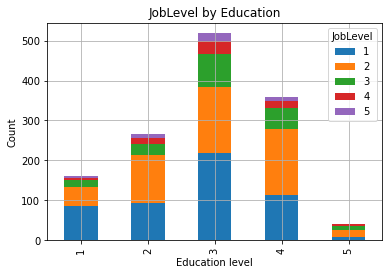

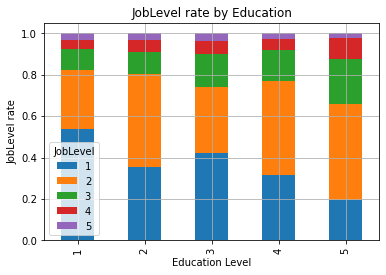

In [64]:
#chart NON NORMALIZZATO  per education e job level 
edu_joblevel.plot(kind='bar', stacked=True, 
                   title='JobLevel by Education')
plt.xlabel('Education level')
plt.ylabel('Count')
plt.grid()
plt.show()

#chart normalizzato 
edu_joblevel_norm.plot(kind='bar', stacked=True, 
                   title='JobLevel rate by Education')
plt.xlabel('Education Level')
plt.ylabel('JobLevel rate')
plt.grid()
plt.show()

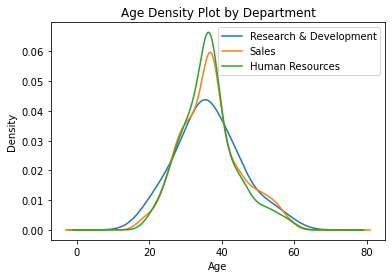

In [65]:
department_density = sorted(df['Department'].unique())
for Department in department_density:
    df.Age[df.Department == Department].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('Age Density Plot by Department')
plt.xlabel('Age')
plt.legend(('Research & Development', 'Sales', 'Human Resources' ), loc='best')
plt.show()

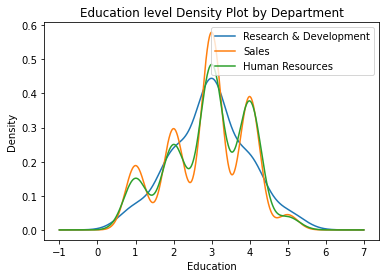

In [66]:
dep_edu_density = sorted(df['Department'].unique())
for Department in dep_edu_density:
    df.Education[df.Department == Department].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('Education level Density Plot by Department')
plt.xlabel('Education')
plt.legend(('Research & Development', 'Sales', 'Human Resources' ), loc='best')
plt.show()

---
